## Projeto 2 - Ciência dos dados

## Integrantes: 

- Luca Guazzelli 

- Pedro Henrique Vidal 

- Rafael Agnelo

## Objetivo: 

- A base de dados é uma base de microdados do ENEM em relação a dados do ENEM por escolas (públicas e privadas) no Brasil. Em relação à isso, faz-se a seguinte pergunta temática:

- A partir de uma série de features (Localidade, Taxa de abandono, Porte da escola , Média das notas em matemática, Tipo da dependência administrativa, Número de participantes do enem que cumprem os requisitos de participação e INSE), qual é o perfil médio de uma escola que performa mal, isto é, de forma insatisfatória em Matemática no ENEM (Média inferior à 500) no ano de 2015?



## Importando Bibliotecas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Carregando base de dados

In [9]:
dados = pd.read_csv('microdados_enem_por_escola\DADOS\MICRODADOS_ENEM_ESCOLA.csv',encoding='latin1', sep=";")

C:\Users\lucah\AppData\Local\Temp\ipykernel_96288\2310550405.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('microdados_enem_por_escola\DADOS\MICRODADOS_ENEM_ESCOLA.csv',encoding='latin1', sep=";")


In [29]:
dados.head(5)

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


## Filtrando a base de dados em base de fetures 

In [33]:
dados_limpando = dados.loc[dados["NU_ANO"] == 2015,("TP_DEPENDENCIA_ADM_ESCOLA", "TP_LOCALIZACAO_ESCOLA", "NU_TAXA_ABANDONO", "PORTE_ESCOLA", "NU_MEDIA_MT", "INSE")]

dados_limpando.head(5)

,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_ABANDONO,PORTE_ESCOLA,NU_MEDIA_MT,INSE
67619,4,1,0.0,Maior que 90 alunos,627.66,Grupo 6
67628,4,1,0.0,De 1 a 30 alunos,459.72,Grupo 4
67640,4,1,0.0,De 31 a 60 alunos,507.22,Grupo 5
67642,4,1,0.8,De 31 a 60 alunos,529.87,Grupo 5
67648,4,1,2.4,De 1 a 30 alunos,528.93,Grupo 5


## Analise Exploratória

Text(0, 0.5, 'Taxa de Abandono')

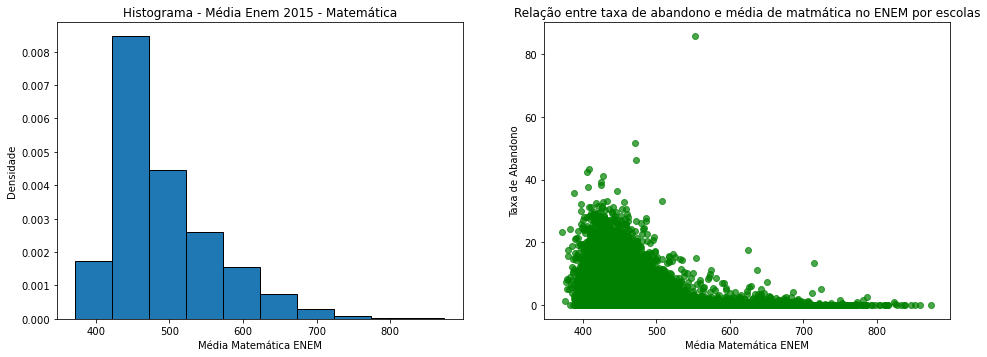

In [72]:
plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.hist(dados_limpando.NU_MEDIA_MT, edgecolor='black', density=True)
plt.title("Histograma - Média Enem 2015 - Matemática")
plt.xlabel('Média Matemática ENEM')
plt.ylabel('Densidade')

plt.subplot(222)
plt.scatter(dados_limpando.NU_MEDIA_MT, dados_limpando.NU_TAXA_ABANDONO, c = 'green', alpha=0.7)
plt.title("Relação entre taxa de abandono e média de matmática no ENEM por escolas")
plt.xlabel('Média Matemática ENEM')
plt.ylabel('Taxa de Abandono')




In [101]:
nu_media = dados_limpando['NU_MEDIA_MT']
TP_depen = dados_limpando['TP_DEPENDENCIA_ADM_ESCOLA']
TP_loc = dados_limpando['TP_LOCALIZACAO_ESCOLA'] 
nu_abandona = dados_limpando['NU_TAXA_ABANDONO']

tipo1 = dados_limpando.loc[dados_limpando["TP_DEPENDENCIA_ADM_ESCOLA"]==1, ["TP_DEPENDENCIA_ADM_ESCOLA","NU_MEDIA_MT"]]

tipo2 = dados_limpando.loc[dados_limpando["TP_DEPENDENCIA_ADM_ESCOLA"]==2, ["TP_DEPENDENCIA_ADM_ESCOLA","NU_MEDIA_MT"]]

tipo3 = dados_limpando.loc[dados_limpando["TP_DEPENDENCIA_ADM_ESCOLA"]==3, ["TP_DEPENDENCIA_ADM_ESCOLA","NU_MEDIA_MT"]]

tipo4 = dados_limpando.loc[dados_limpando["TP_DEPENDENCIA_ADM_ESCOLA"]==4, ["TP_DEPENDENCIA_ADM_ESCOLA","NU_MEDIA_MT"]]

tipo1.head()

,TP_DEPENDENCIA_ADM_ESCOLA,NU_MEDIA_MT
68518,1,524.56
68658,1,520.19
68667,1,524.89
68670,1,506.24
68674,1,503.82


In [98]:
tipo2.head()


,TP_DEPENDENCIA_ADM_ESCOLA,NU_MEDIA_MT
67660,2,492.85
67662,2,456.92
67677,2,417.62
67682,2,429.04
67687,2,411.69


In [99]:
tipo3.head()

,TP_DEPENDENCIA_ADM_ESCOLA,NU_MEDIA_MT
71963,3,449.30
76577,3,460.91
86315,3,412.99
86565,3,471.57
89535,3,449.40


In [100]:
tipo4.head()

,TP_DEPENDENCIA_ADM_ESCOLA,NU_MEDIA_MT
67619,4,627.66
67628,4,459.72
67640,4,507.22
67642,4,529.87
67648,4,528.93
